# Telco Customer Churn – Exploratory Data Analysis

In [1]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit prettier
plt.style.use("ggplot")
sns.set(font_scale=0.9)

#  Load the Telco Customer Churn dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick peek
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# data cleaning

In [2]:
#  Inspect structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
#  Clean 'TotalCharges'
# In this dataset, TotalCharges is read as object because of some blank strings.
# We convert it to numeric and coerce errors to NaN.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values we have now
df.isna().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
# drop rows where TotalCharges is NaN (they are very few)
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)


# numerical summary

In [5]:
# Step 6: Summary statistics for key numeric variables
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Overall churn rate

Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


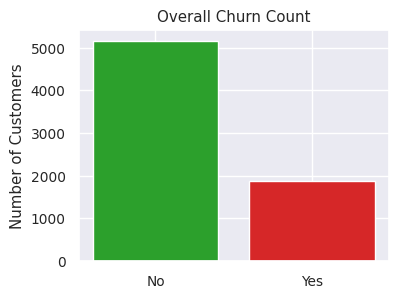

In [6]:
#  Churn distribution
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print(churn_counts)
print(churn_percent.round(2))

# Plot overall churn
plt.figure(figsize=(4,3))
plt.bar(churn_counts.index, churn_counts.values, color=["tab:green","tab:red"])
plt.title("Overall Churn Count")
plt.ylabel("Number of Customers")
plt.show()


# Create tenure groups

In [7]:
#  Create tenure groups for easier analysis
bins = [0, 12, 24, 48, 72]
labels = ['0-12', '13-24', '25-48', '49-72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

df['tenure_group'].value_counts().sort_index()


tenure_group
0-12     2175
13-24    1024
25-48    1594
49-72    2239
Name: count, dtype: int64

# Demographic analysis

Gender vs Churn

Churn      No    Yes
gender              
Female  73.04  26.96
Male    73.80  26.20


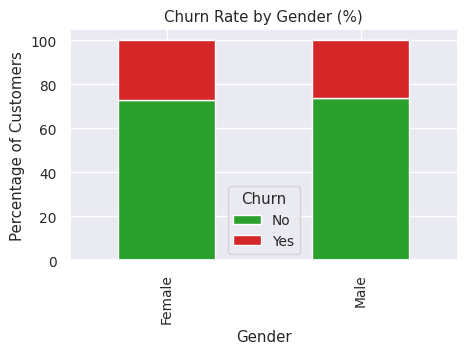

In [8]:
#  Churn by gender
gender_churn = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
print(gender_churn.round(2))

gender_churn[['No','Yes']].plot(kind='bar', stacked=True, figsize=(5,3),
                                color=['tab:green','tab:red'])
plt.title("Churn Rate by Gender (%)")
plt.ylabel("Percentage of Customers")
plt.xlabel("Gender")
plt.legend(title="Churn")
plt.show()


Senior citizens vs Churn

Churn             No    Yes
SeniorCitizen              
0              76.35  23.65
1              58.32  41.68


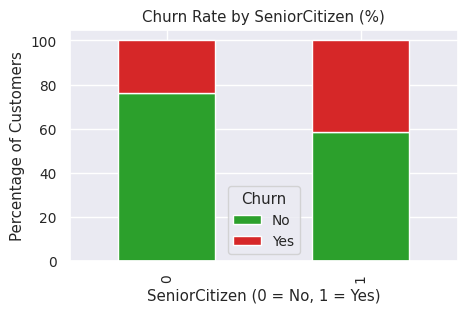

In [9]:
# Churn by senior citizen status
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
print(senior_churn.round(2))

senior_churn.plot(kind='bar', stacked=True, figsize=(5,3),
                  color=['tab:green','tab:red'])
plt.title("Churn Rate by SeniorCitizen (%)")
plt.ylabel("Percentage of Customers")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.show()


Partner & Dependents

Churn       No    Yes
Partner              
No       67.02  32.98
Yes      80.28  19.72


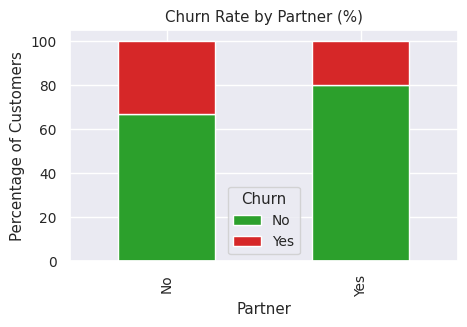

Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.47  15.53


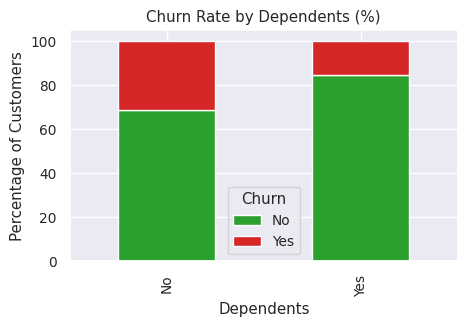

In [10]:
# Churn by Partner
partner_churn = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
print(partner_churn.round(2))

partner_churn.plot(kind='bar', stacked=True, figsize=(5,3),
                   color=['tab:green','tab:red'])
plt.title("Churn Rate by Partner (%)")
plt.ylabel("Percentage of Customers")
plt.show()

# Churn by Dependents
dependents_churn = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
print(dependents_churn.round(2))

dependents_churn.plot(kind='bar', stacked=True, figsize=(5,3),
                      color=['tab:green','tab:red'])
plt.title("Churn Rate by Dependents (%)")
plt.ylabel("Percentage of Customers")
plt.show()


# Contract & Tenure impact

Contract type vs Churn

Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.72  11.28
Two year        97.15   2.85


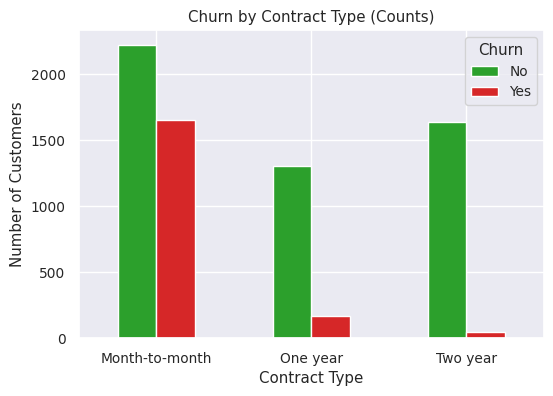

In [11]:
#  Churn by contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn.round(2))

pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', figsize=(6,4),
                                              color=['tab:green','tab:red'])
plt.title("Churn by Contract Type (Counts)")
plt.ylabel("Number of Customers")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.show()


Tenure group vs Churn

Churn            No    Yes
tenure_group              
0-12          52.32  47.68
13-24         71.29  28.71
25-48         79.61  20.39
49-72         90.49   9.51


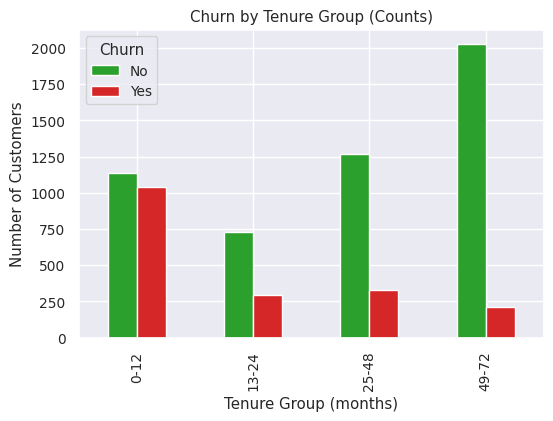

In [12]:
# Churn by tenure group
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100
print(tenure_churn.round(2))

pd.crosstab(df['tenure_group'], df['Churn']).plot(kind='bar', figsize=(6,4),
                                                  color=['tab:green','tab:red'])
plt.title("Churn by Tenure Group (Counts)")
plt.ylabel("Number of Customers")
plt.xlabel("Tenure Group (months)")
plt.show()


# Internet & value-added services

Internet service vs Churn

Churn               No    Yes
InternetService              
DSL              81.00  19.00
Fiber optic      58.11  41.89
No               92.57   7.43


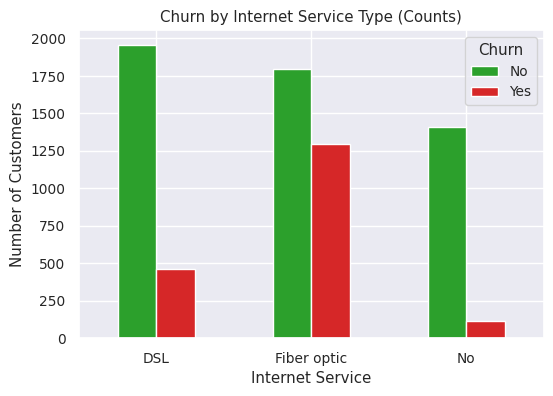

In [13]:
#  Churn by InternetService
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(internet_churn.round(2))

pd.crosstab(df['InternetService'], df['Churn']).plot(kind='bar', figsize=(6,4),
                                                     color=['tab:green','tab:red'])
plt.title("Churn by Internet Service Type (Counts)")
plt.ylabel("Number of Customers")
plt.xlabel("Internet Service")
plt.xticks(rotation=0)
plt.show()


Online security & tech support vs Churn

Churn                   No    Yes
OnlineSecurity                   
No                   58.22  41.78
No internet service  92.57   7.43
Yes                  85.36  14.64


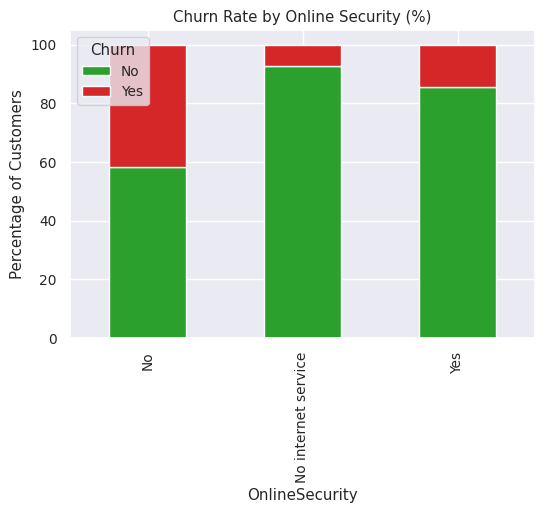

Churn                   No    Yes
TechSupport                      
No                   58.35  41.65
No internet service  92.57   7.43
Yes                  84.80  15.20


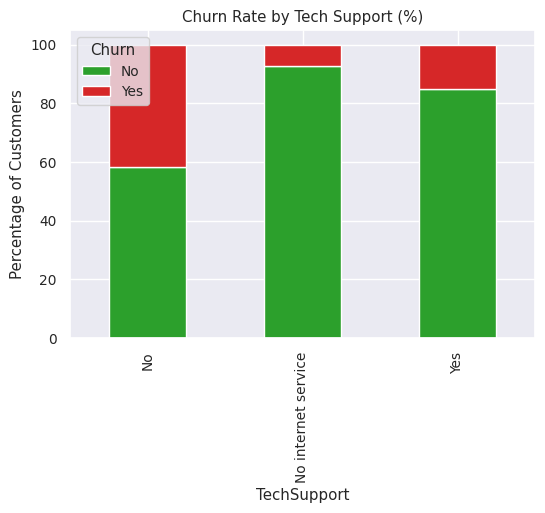

In [14]:
#  Churn by OnlineSecurity
security_churn = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100
print(security_churn.round(2))

security_churn.plot(kind='bar', stacked=True, figsize=(6,4),
                    color=['tab:green','tab:red'])
plt.title("Churn Rate by Online Security (%)")
plt.ylabel("Percentage of Customers")
plt.show()

# Churn by TechSupport
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
print(tech_churn.round(2))

tech_churn.plot(kind='bar', stacked=True, figsize=(6,4),
                color=['tab:green','tab:red'])
plt.title("Churn Rate by Tech Support (%)")
plt.ylabel("Percentage of Customers")
plt.show()


# Payment method & churn

Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20


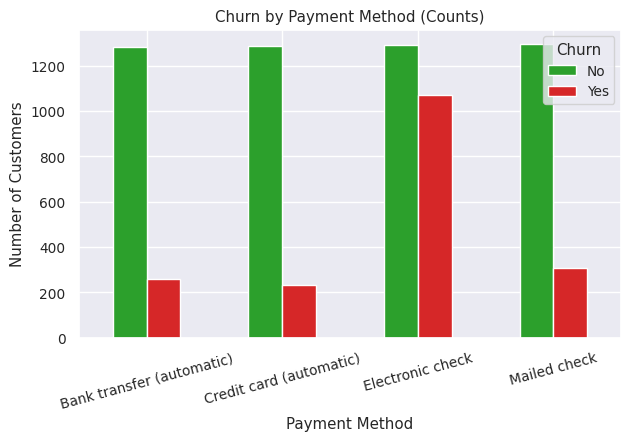

In [15]:
# Churn by PaymentMethod
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print(payment_churn.round(2))

pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar', figsize=(7,4),
                                                   color=['tab:green','tab:red'])
plt.title("Churn by Payment Method (Counts)")
plt.ylabel("Number of Customers")
plt.xlabel("Payment Method")
plt.xticks(rotation=15)
plt.show()
